# 필요 모듈 및 데이터 로딩 로딩

In [1]:
# 필요 모듈 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import FinanceDataReader as fdr
import pandas_datareader as pdr
import yfinance as yf

from module import stationarity_adf_test, stationarity_kpss_test

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [2]:
# 나스닥 종가 로딩
nasdaq = fdr.DataReader('IXIC', start='2020-01-01', end='2022-01-01')
nasdaq = nasdaq[['Close']]
nasdaq

,Close
Date,
2020-01-02,"9,092.19"
2020-01-03,"9,020.77"
2020-01-06,"9,071.47"
2020-01-07,"9,068.58"
2020-01-08,"9,129.24"
...,...
2021-12-27,"15,871.26"
2021-12-28,"15,781.72"
2021-12-29,"15,766.22"


In [3]:
# 비트코인 종가 로딩
bit = yf.download('BTC-USD',start='2020-01-02', end='2022-01-02')
bit = bit[['Close']]
bit

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-01,"7,200.17"
2020-01-02,"6,985.47"
2020-01-03,"7,344.88"
2020-01-04,"7,410.66"
2020-01-05,"7,411.32"
...,...
2021-12-28,"47,588.86"
2021-12-29,"46,444.71"
2021-12-30,"47,178.12"


In [4]:
# 이더리움 종가 로딩
eth = yf.download('ETH-USD',start='2020-01-02', end='2022-01-02')
eth = eth[['Close']]
eth

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-01,130.80
2020-01-02,127.41
2020-01-03,134.17
2020-01-04,135.07
2020-01-05,136.28
...,...
2021-12-28,"3,800.89"
2021-12-29,"3,628.53"
2021-12-30,"3,713.85"


In [5]:
# PDI와 PCE 로딩
pdi = fdr.DataReader('PDI', start='1970-01-01', end='2010-01-01', data_source='fred')
pce = fdr.DataReader('PCE', start='1970-01-01',  end='2010-01-01', data_source='fred')
df1 = pd.merge(pdi,pce, how='inner', on='DATE')
df1

,PDI,PCE
DATE,,
1970-01-01,24.70,628.70
1970-02-01,24.50,634.00
1970-03-01,24.40,632.30
1970-04-01,24.30,636.00
1970-05-01,24.30,642.40
...,...,...
2009-09-01,494.60,"9,927.80"
2009-10-01,485.00,"9,976.70"
2009-11-01,479.10,"9,985.70"


# 데이터 시각화

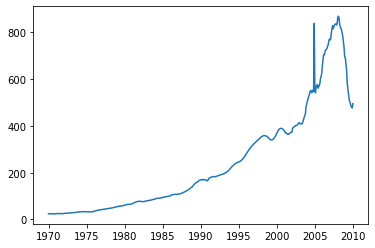

In [6]:
plt.plot(df1.PDI)

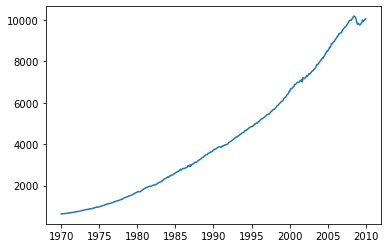

In [7]:
plt.plot(df1.PCE)

# 데이터 전처리

In [8]:
# 코인 데이터 프레임을 합쳐줌
coin = pd.merge(bit,eth, how='inner', on='Date')

# 코인 컬럼명 변경
coin.rename(columns={'Close_x':'bit', 'Close_y':'eth'}, inplace=True)

# 코인과 나스닥 데이터 프레임을 합쳐줌
coin_nasdaq = pd.merge(coin,nasdaq, how='inner', on='Date')

# 나스닥 컬럼명 변경
coin_nasdaq.rename(columns={'Close':'nasdaq'}, inplace=True)
coin_nasdaq

,bit,eth,nasdaq
Date,,,
2020-01-02,"6,985.47",127.41,"9,092.19"
2020-01-03,"7,344.88",134.17,"9,020.77"
2020-01-06,"7,769.22",144.30,"9,071.47"
2020-01-07,"8,163.69",143.54,"9,068.58"
2020-01-08,"8,079.86",141.26,"9,129.24"
...,...,...,...
2021-12-27,"50,640.42","4,037.55","15,871.26"
2021-12-28,"47,588.86","3,800.89","15,781.72"
2021-12-29,"46,444.71","3,628.53","15,766.22"


# 정상성 테스트

In [9]:
print('PDI로그씌우고 1차 차분 데이터의 정상성 테스트')
display(pd.Series(sm.tsa.stattools.adfuller(np.log(df1['PDI']).diff(1).dropna(), maxlag=3, autolag=None) [0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

print('PCE로그씌우고 1차 차분 데이터의 정상성 테스트')
display(pd.Series(sm.tsa.stattools.adfuller(np.log(df1['PCE']).diff(1).dropna(), maxlag=3, autolag=None) [0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

print('bit로그씌우고 1차 차분 데이터의 정상성 테스트')
display(pd.Series(sm.tsa.stattools.adfuller(np.log(coin_nasdaq['bit']).diff(1).dropna(), maxlag=3, autolag=None) [0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

print('eth로그씌우고 1차 차분 데이터의 정상성 테스트')
display(pd.Series(sm.tsa.stattools.adfuller(np.log(coin_nasdaq['eth']).diff(1).dropna(), maxlag=3, autolag=None) [0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

print('nasdaq 로그씌우고 1차 차분 데이터의 정상성 테스트')
display(pd.Series(sm.tsa.stattools.adfuller(np.log(coin_nasdaq['nasdaq']).diff(1).dropna(), maxlag=3, autolag=None) [0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

PDI로그씌우고 1차 차분 데이터의 정상성 테스트


Test Statistics      -9.13
p-value               0.00
Used Lag              3.00
Used Observations   476.00
dtype: float64

PCE로그씌우고 1차 차분 데이터의 정상성 테스트


Test Statistics      -8.00
p-value               0.00
Used Lag              3.00
Used Observations   476.00
dtype: float64

bit로그씌우고 1차 차분 데이터의 정상성 테스트


Test Statistics     -10.04
p-value               0.00
Used Lag              3.00
Used Observations   500.00
dtype: float64

eth로그씌우고 1차 차분 데이터의 정상성 테스트


Test Statistics     -10.69
p-value               0.00
Used Lag              3.00
Used Observations   500.00
dtype: float64

nasdaq 로그씌우고 1차 차분 데이터의 정상성 테스트


Test Statistics     -11.38
p-value               0.00
Used Lag              3.00
Used Observations   500.00
dtype: float64

# OLS

## 이더와 비트 OLS

In [10]:
model1 = smf.ols('eth ~ bit',data=coin_nasdaq).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    eth   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2251.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          7.82e-188
Time:                        22:18:15   Log-Likelihood:                -3958.4
No. Observations:                 505   AIC:                             7921.
Df Residuals:                     503   BIC:                             7929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -386.0723     49.098     -7.863      0.0

## 이더와 비트의 OLS 잔차항 adf테스트

In [11]:
target = model1.resid
display(pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

Test Statistics      -2.00
p-value               0.29
Used Lag             16.00
Used Observations   488.00
dtype: float64

## PCE와 PDI OLS 

In [12]:
# time-trend 추가
df1 = sm.tsa.tsatools.add_trend(df1, trend='t')
df1

,PDI,PCE,trend
DATE,,,
1970-01-01,24.70,628.70,1.00
1970-02-01,24.50,634.00,2.00
1970-03-01,24.40,632.30,3.00
1970-04-01,24.30,636.00,4.00
1970-05-01,24.30,642.40,5.00
...,...,...,...
2009-09-01,494.60,"9,927.80",477.00
2009-10-01,485.00,"9,976.70",478.00
2009-11-01,479.10,"9,985.70",479.00


In [13]:
# 상수항 추가 
df1 = sm.add_constant(df1)
df1

,const,PDI,PCE,trend
DATE,,,,
1970-01-01,1.00,24.70,628.70,1.00
1970-02-01,1.00,24.50,634.00,2.00
1970-03-01,1.00,24.40,632.30,3.00
1970-04-01,1.00,24.30,636.00,4.00
1970-05-01,1.00,24.30,642.40,5.00
...,...,...,...,...
2009-09-01,1.00,494.60,"9,927.80",477.00
2009-10-01,1.00,485.00,"9,976.70",478.00
2009-11-01,1.00,479.10,"9,985.70",479.00


In [14]:
# log씌운 변수 추가
df1['log_PDI'] = np.log(df1.PDI)
df1['log_PCE'] = np.log(df1.PCE)
df1

,const,PDI,PCE,trend,log_PDI,log_PCE
DATE,,,,,,
1970-01-01,1.00,24.70,628.70,1.00,3.21,6.44
1970-02-01,1.00,24.50,634.00,2.00,3.20,6.45
1970-03-01,1.00,24.40,632.30,3.00,3.19,6.45
1970-04-01,1.00,24.30,636.00,4.00,3.19,6.46
1970-05-01,1.00,24.30,642.40,5.00,3.19,6.47
...,...,...,...,...,...,...
2009-09-01,1.00,494.60,"9,927.80",477.00,6.20,9.20
2009-10-01,1.00,485.00,"9,976.70",478.00,6.18,9.21
2009-11-01,1.00,479.10,"9,985.70",479.00,6.17,9.21


In [15]:
model2 = smf.ols('log_PCE ~ log_PDI+trend',data=df1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_PCE   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:18:15   Log-Likelihood:                 425.75
No. Observations:                 481   AIC:                            -845.5
Df Residuals:                     478   BIC:                            -833.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9734      0.123     40.509      0.0

## PCE와 PDI의 OLS 잔차항 adf테스트

In [16]:
display(pd.Series(sm.tsa.stattools.adfuller(model2.resid, regression='nc', maxlag=1,autolag= None)[0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

Test Statistics      -2.31
p-value               0.02
Used Lag              1.00
Used Observations   479.00
dtype: float64

In [17]:
# model2에서 잔차항을 e_hat으로 추가
df1['e_hat'] = model2.resid
df1

,const,PDI,PCE,trend,log_PDI,log_PCE,e_hat
DATE,,,,,,,
1970-01-01,1.00,24.70,628.70,1.00,3.21,6.44,-0.24
1970-02-01,1.00,24.50,634.00,2.00,3.20,6.45,-0.23
1970-03-01,1.00,24.40,632.30,3.00,3.19,6.45,-0.23
1970-04-01,1.00,24.30,636.00,4.00,3.19,6.46,-0.23
1970-05-01,1.00,24.30,642.40,5.00,3.19,6.47,-0.22
...,...,...,...,...,...,...,...
2009-09-01,1.00,494.60,"9,927.80",477.00,6.20,9.20,0.06
2009-10-01,1.00,485.00,"9,976.70",478.00,6.18,9.21,0.07
2009-11-01,1.00,479.10,"9,985.70",479.00,6.17,9.21,0.07


In [18]:
# 로그씌우고 1차 차분 추가
df1['log_PDI_diff'] = df1.log_PDI.diff(1).dropna()
df1['log_PCE_diff'] = df1.log_PCE.diff(1).dropna()
df1 = df1.dropna(axis=0)
df1

,const,PDI,PCE,trend,log_PDI,log_PCE,e_hat,log_PDI_diff,log_PCE_diff
DATE,,,,,,,,,
1970-02-01,1.00,24.50,634.00,2.00,3.20,6.45,-0.23,-0.01,0.01
1970-03-01,1.00,24.40,632.30,3.00,3.19,6.45,-0.23,-0.00,-0.00
1970-04-01,1.00,24.30,636.00,4.00,3.19,6.46,-0.23,-0.00,0.01
1970-05-01,1.00,24.30,642.40,5.00,3.19,6.47,-0.22,0.00,0.01
1970-06-01,1.00,24.20,646.30,6.00,3.19,6.47,-0.21,-0.00,0.01
...,...,...,...,...,...,...,...,...,...
2009-09-01,1.00,494.60,"9,927.80",477.00,6.20,9.20,0.06,-0.02,-0.01
2009-10-01,1.00,485.00,"9,976.70",478.00,6.18,9.21,0.07,-0.02,0.00
2009-11-01,1.00,479.10,"9,985.70",479.00,6.17,9.21,0.07,-0.01,0.00


In [19]:
# 로그씌우고 1차 차분한 변수에 e_hat을 넣어서 단기적인 관계를 살펴봄
model3 = smf.ols('log_PCE_diff ~ log_PDI_diff+e_hat',data=df1).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_PCE_diff   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.968
Date:                Sun, 12 Jun 2022   Prob (F-statistic):             0.0524
Time:                        22:18:15   Log-Likelihood:                 1807.2
No. Observations:                 480   AIC:                            -3608.
Df Residuals:                     477   BIC:                            -3596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0057      0.000     21.644   

In [20]:
df1['log_PDI']

DATE
1970-02-01   3.20
1970-03-01   3.19
1970-04-01   3.19
1970-05-01   3.19
1970-06-01   3.19
             ... 
2009-09-01   6.20
2009-10-01   6.18
2009-11-01   6.17
2009-12-01   6.17
2010-01-01   6.20
Name: log_PDI, Length: 480, dtype: float64

In [22]:
sm.tsa.coint(df1['log_PDI'], df1['log_PCE'])

(-2.8251724654096293,
 0.157806662162422,
 array([-3.91945022, -3.34891569, -3.05331613]))